In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_124 (Conv2D)         (None, 26, 26, 1)         10        
                                                                 
 max_pooling2d_124 (MaxPooli  (None, 13, 13, 1)        0         
 ng2D)                                                           
                                                                 
 conv2d_125 (Conv2D)         (None, 11, 11, 1)         10        
                                                                 
 max_pooling2d_125 (MaxPooli  (None, 5, 5, 1)          0         
 ng2D)                                                           
                                                                 
 flatten_45 (Flatten)        (None, 25)                0         
                                                                 
 dense_68 (Dense)            (None, 1)               

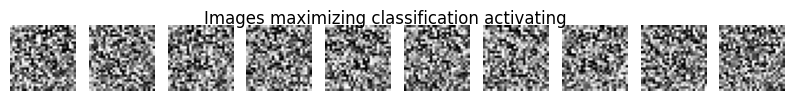

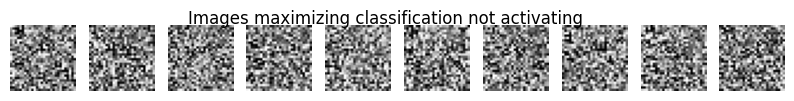

tf.Tensor([[1.3276463e-05]], shape=(1, 1), dtype=float32)
tf.Tensor([[5.9175018e-05]], shape=(1, 1), dtype=float32)
tf.Tensor([[2.7078855e-05]], shape=(1, 1), dtype=float32)
tf.Tensor([[5.1710467e-05]], shape=(1, 1), dtype=float32)
tf.Tensor([[8.590898e-06]], shape=(1, 1), dtype=float32)
tf.Tensor([[8.878495e-05]], shape=(1, 1), dtype=float32)
tf.Tensor([[2.4219129e-05]], shape=(1, 1), dtype=float32)
tf.Tensor([[4.5595887e-05]], shape=(1, 1), dtype=float32)
tf.Tensor([[2.388986e-05]], shape=(1, 1), dtype=float32)
tf.Tensor([[6.149588e-05]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.9689538]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.977778]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.955961]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.95467603]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.96223116]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.97024477]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.97107667]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.9569657]], shape=(1, 1), dtype

In [42]:
# Create a simple CNN model
def create_model():
    model = models.Sequential([
    layers.Conv2D(1, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Generate images to maximize the classification output
def generate_images(model, target_class, n_images=10, n_steps=50, step_size=.01):
    images = []
    target_class = np.array([target_class], dtype=np.float32)  # Ensure target_class is a float32 array
    
    for _ in range(n_images):
        print('Generating image', len(images)+1, 'of', n_images, '...')
        tf.random.set_seed(None)
        input_img = tf.random.uniform((1, 28, 28, 1), minval=-1.0, maxval=1.0)
        input_img = tf.Variable(input_img, dtype=tf.float32)

        for _ in range(n_steps):
            with tf.GradientTape() as tape:
                tape.watch(input_img)
                prediction = model(input_img)
                loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(target_class, prediction))

            gradients = tape.gradient(loss, input_img)
            normalized_gradients = tf.sign(gradients)
            input_img.assign_add(step_size * normalized_gradients)
            input_img.assign(tf.clip_by_value(input_img, -1.0, 1.0))
        
        images.append(tf.squeeze(input_img).numpy())

    return images


# Display generated images
def display_images(images, title):
    plt.figure(figsize=(10, 1))
    for i, image in enumerate(images):
        plt.subplot(1, 10, i+1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

with tf.device('/cpu:0'):
    # Create and initialize the model
    model = create_model()
    model.summary()

    # Generate 10 images maximizing classification activation (class 1)
    activating_images = generate_images(model, target_class=np.array([1.0]), n_images=10)

    # Generate 10 images maximizing classification not activating (class 0)
    not_activating_images = generate_images(model, target_class=np.array([0.0]), n_images=10)

    # Display the generated images
    display_images(activating_images, title='Images maximizing classification activating')
    display_images(not_activating_images, title='Images maximizing classification not activating')

    for images in activating_images:
        print(model(np.expand_dims(images, axis=0)))
    for images in not_activating_images:
        print(model(np.expand_dims(images, axis=0)))